In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('MetroPT3_AirCompressor.csv')




In [3]:
df.head(4)

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [4]:
list_of_column_names = df.columns.tolist()
list_of_column_names

['Unnamed: 0',
 'timestamp',
 'TP2',
 'TP3',
 'H1',
 'DV_pressure',
 'Reservoirs',
 'Oil_temperature',
 'Motor_current',
 'COMP',
 'DV_eletric',
 'Towers',
 'MPG',
 'LPS',
 'Pressure_switch',
 'Oil_level',
 'Caudal_impulses']

In [5]:
df_to_numpy = df.to_numpy()
period = df_to_numpy[:,0]
timestamp = df_to_numpy[:,1]


In [6]:
anomaly_ts_1_start = '2020-04-18 00:00:01' #tested
anomaly_ts_1_stop = '2020-04-18 23:59:56'  #tested

anomaly_ts_2_start = '2020-05-29 23:30:08' #tested
anomaly_ts_2_stop = '2020-05-30 06:00:04'  #tested

anomaly_ts_3_start = '2020-06-05 10:00:04'#tested
anomaly_ts_3_stop = '2020-06-07 14:19:39' #tested: there is no sensor data from 14:19:40 until 2020-06-08 11:48:04

anomaly_ts_4_start = '2020-07-15 14:30:00' #tested
anomaly_ts_4_stop = '2020-07-15 19:00:00'  #tested

In [7]:
# Extracting anomaly sets

# Anomaly Set 1
start_index = np.where(timestamp == anomaly_ts_1_start)[0]
start_index1 = int(start_index)
stop_index = np.where(timestamp == anomaly_ts_1_stop)[0]
stop_index1 = int(stop_index)
anomaly_set_1 = df_to_numpy[start_index1:stop_index1+1,:]

# Anomaly Set 2
start_index = np.where(timestamp == anomaly_ts_2_start)[0]
start_index2 = int(start_index)
stop_index = np.where(timestamp == anomaly_ts_2_stop)[0]
stop_index2 = int(stop_index)
anomaly_set_2 = df_to_numpy[start_index2:stop_index2+1,:]

# Anomaly Set 3
start_index = np.where(timestamp == anomaly_ts_3_start)[0]
start_index3 = int(start_index)
stop_index = np.where(timestamp == anomaly_ts_3_stop)[0]
stop_index3 = int(stop_index)
anomaly_set_3 = df_to_numpy[start_index3:stop_index3+1,:]

# Anomaly Set 4
start_index = np.where(timestamp == anomaly_ts_4_start)[0]
start_index4 = int(start_index)
stop_index = np.where(timestamp == anomaly_ts_4_stop)[0]
stop_index4 = int(stop_index)
anomaly_set_4 = df_to_numpy[start_index4:stop_index4+1,:]

anamaly_num = len(anomaly_set_1)+len(anomaly_set_2)+len(anomaly_set_3)+len(anomaly_set_4)
normal_num = len(timestamp) - anamaly_num





In [8]:
anomaly_set = np.concatenate((anomaly_set_1,anomaly_set_2,anomaly_set_3,anomaly_set_4),axis = 0)
print(anomaly_set.shape)
anomaly_set

(29961, 17)


array([[5625640, '2020-04-18 00:00:01', -0.0180000000000006, ..., 1.0,
        1.0, 1.0],
       [5625650, '2020-04-18 00:00:13', -0.0180000000000006, ..., 1.0,
        1.0, 1.0],
       [5625660, '2020-04-18 00:00:24', -0.0180000000000006, ..., 1.0,
        1.0, 1.0],
       ...,
       [11727120, '2020-07-15 18:59:40', -0.0040000000000013, ..., 1.0,
        1.0, 1.0],
       [11727130, '2020-07-15 18:59:50', -0.0060000000000002, ..., 1.0,
        1.0, 1.0],
       [11727140, '2020-07-15 19:00:00', -0.0060000000000002, ..., 1.0,
        1.0, 1.0]], dtype=object)

In [9]:
print(normal_num)
print(anamaly_num)
print(normal_num+anamaly_num)

1486987
29961
1516948


In [10]:
# Normal Set
normal_set = df_to_numpy[0:start_index1]
normal_set = np.append(normal_set,df_to_numpy[stop_index1+1:start_index2,:],axis = 0)
normal_set = np.append(normal_set,df_to_numpy[stop_index2+1:start_index3,:],axis = 0)
normal_set = np.append(normal_set,df_to_numpy[stop_index3+1:start_index4,:],axis = 0)
normal_set = np.append(normal_set,df_to_numpy[stop_index4+1:-1], axis = 0)


In [11]:
normal_set_continuous = normal_set[:,[2,3,4,5,6,7,8]]
np.save('normal_samples',normal_set_continuous)     # save 'normal_set_continuous' to 'normal_samples.npy' 
norm_set_cov = np.cov(normal_set_continuous.astype(np.float64).T)


In [12]:
anomaly_set_continuous = anomaly_set[:,[2,3,4,5,6,7,8]]
np.save('anomaly_samples',anomaly_set_continuous)   # save 'anomaly_set_continuous' to 'anomaly_samples.npy'
anom_set_cov = np.cov(anomaly_set_continuous.astype(np.float64).T)

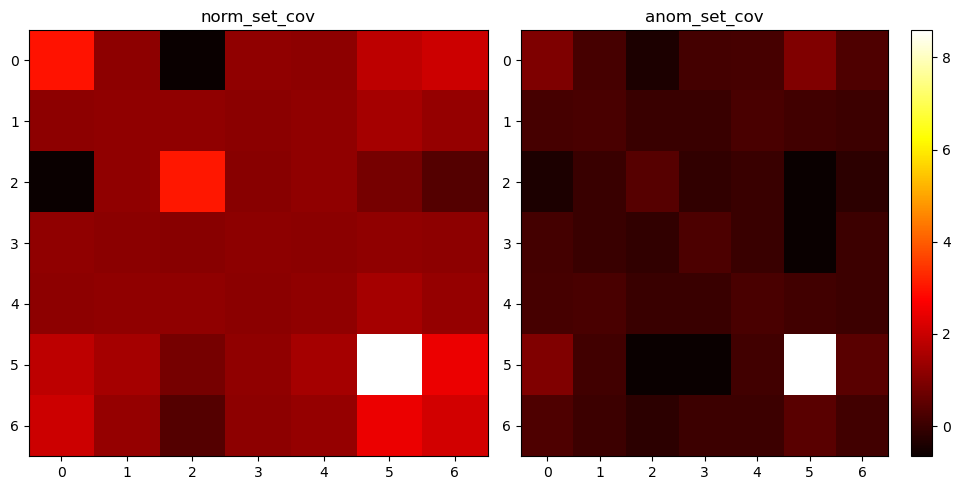

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))

# Plot the first array as a heatmap
plt.subplot(1, 2, 1)
plt.imshow(norm_set_cov, cmap='hot', interpolation='nearest', aspect='auto')
plt.title('norm_set_cov')

# Plot the second array as a heatmap
plt.subplot(1, 2, 2)
plt.imshow(anom_set_cov, cmap='hot', interpolation='nearest', aspect='auto')
plt.title('anom_set_cov')

# Add colorbars
plt.colorbar()

# Show the plot
plt.tight_layout()
plt.show()

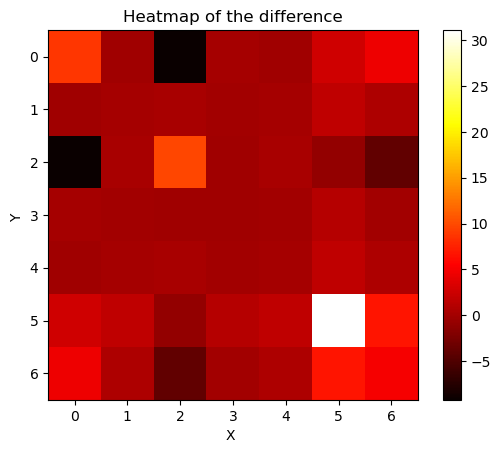

In [14]:
plt.imshow(norm_set_cov-anom_set_cov, cmap='hot', interpolation='nearest')
plt.colorbar()  # Add colorbar
plt.title('Heatmap of the difference')
plt.xlabel('X ')
plt.ylabel('Y ')
plt.show()


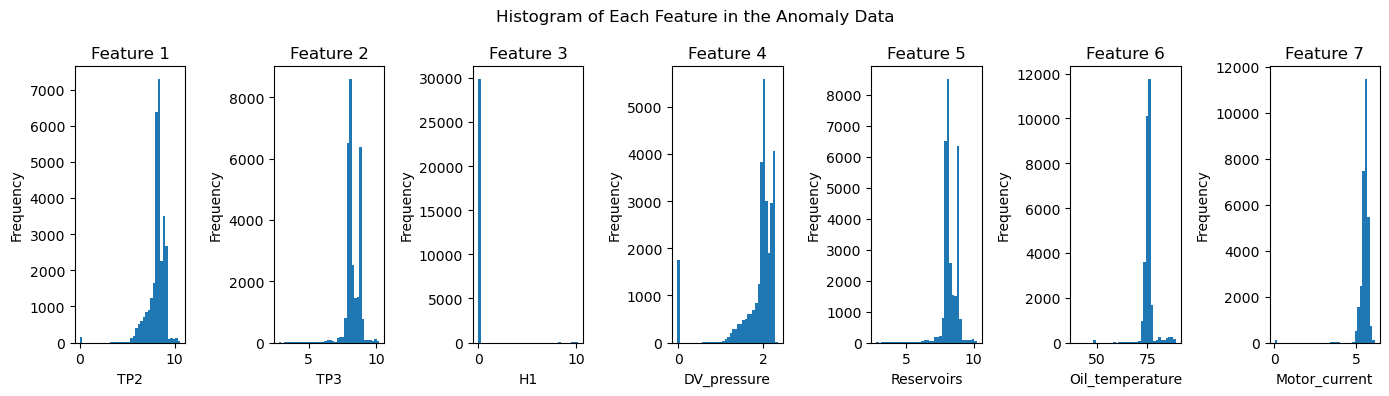

In [15]:
# Histogram for features in anomaly dataset

# Sample NumPy array (replace with your actual data)
data = anomaly_set_continuous

# Number of features (columns)
num_features = data.shape[1]

# Create a subplot grid for plotting
fig, axes = plt.subplots(nrows=1, ncols=num_features, figsize=(14, 4))


# Plot histogram for each feature (column)
for i in range(num_features):
  axes[i].hist(data[:, i],bins = 40)  # data[:, i] selects the i-th column
  axes[i].set_title(f"Feature {i+1}")  # Customize titles if needed
  axes[i].set_xlabel(list_of_column_names[i+2])
  axes[i].set_ylabel("Frequency")

# Adjust layout and display the plot
fig.suptitle("Histogram of Each Feature in the Anomaly Data")
plt.tight_layout()
plt.show()

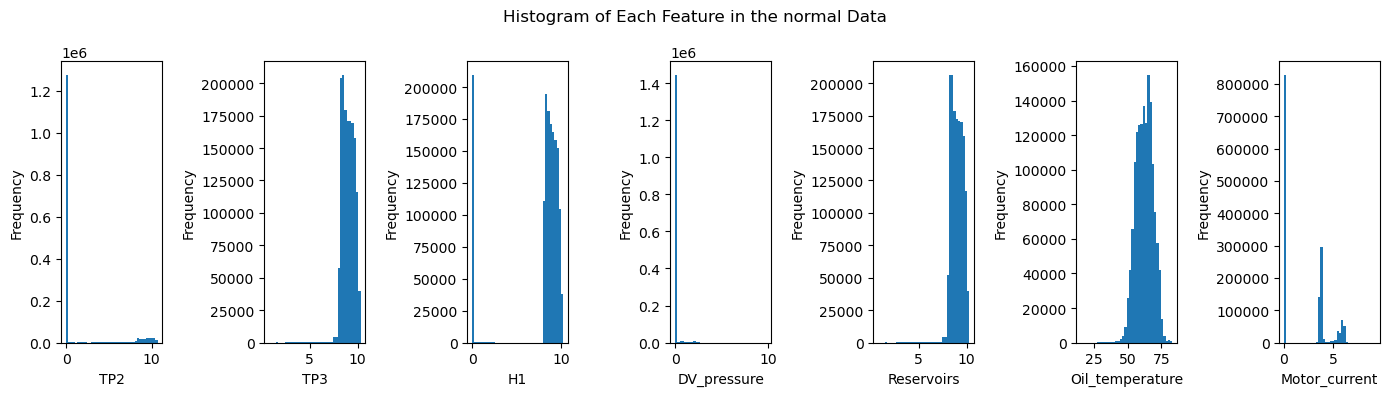

In [16]:
# Histogram of features in normal dataset
# Sample NumPy array (replace with your actual data)
data = normal_set_continuous

# Number of features (columns)
num_features = data.shape[1]

# Create a subplot grid for plotting
fig, axes = plt.subplots(nrows=1, ncols=num_features, figsize=(14, 4))

# Plot histogram for each feature (column)
for i in range(num_features):
  axes[i].hist(data[:, i],bins = 40)  # data[:, i] selects the i-th column
#   axes[i].set_title(f"Feature {i+1}")  # Customize titles if needed
  axes[i].set_xlabel(list_of_column_names[i+2])
  axes[i].set_ylabel("Frequency")

# Adjust layout and display the plot
fig.suptitle("Histogram of Each Feature in the normal Data")
plt.tight_layout()
plt.show()

In [17]:
# Put together 'normal_set_continuous' and 'anomaly_set_continuous' 
all_continuous = np.concatenate((normal_set_continuous,anomaly_set_continuous))
all_continuous = all_continuous.astype(np.float64) # Converting elements to np.float64 in order to enable 
                                                   # vectorized operations in next line


In [18]:
from functions import normalized
normalized_all_continuous = normalized(all_continuous)


In [19]:
# Performing Hotelling Transform
from functions import hotelling
num_of_comp = 2
pcs,portion = hotelling(normalized_all_continuous,num_of_comp)

In [20]:
# data visualization in lower dimension
# projected_data = ((pcs.T)@(normalized_all_continuous.T)).T       #(AxB)T = (BT)x(AT)  so we can write it simpler as next row
projected_data =  normalized_all_continuous@pcs

len(projected_data[:,0])


1516947

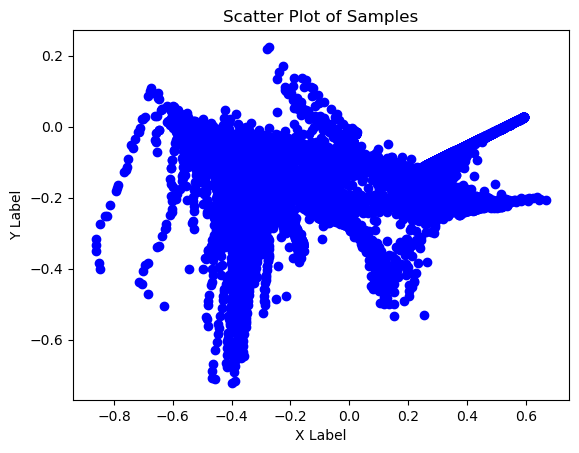

In [21]:
plt.scatter(projected_data[0:1486986,0], projected_data[0:1486986,1],color = 'blue')  # Assuming you want to plot the first two columns
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.title('Scatter Plot of Samples')

plt.show()

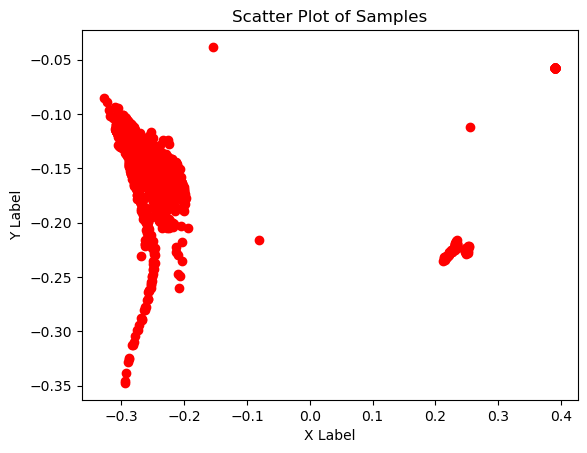

In [22]:
plt.scatter(projected_data[1486986:,0], projected_data[1486986:,1], color ='red')  # Assuming you want to plot the first two columns
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.title('Scatter Plot of Samples')

plt.show()

In [23]:
# Separate normal data and anomalies
normal_projected = projected_data[:1486987]
anomalies_projected = projected_data[1486987:]
normal_projected.shape

(1486987, 2)

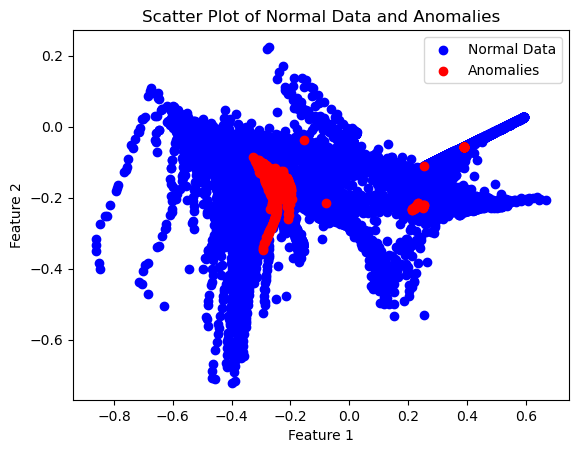

In [24]:
# Separate normal data and anomalies
normal_projected = projected_data[:1486987]
anomalies_projected = projected_data[1486987:]

# Plot normal data
plt.scatter(normal_projected[:, 0], normal_projected[:, 1], color='blue', label='Normal Data')

# Plot anomalies
plt.scatter(anomalies_projected[:, 0], anomalies_projected[:, 1], color='red', label='Anomalies')

# Add labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Normal Data and Anomalies')

# Add legend
plt.legend()

# Show plot
plt.show()

In [129]:
# Cla

# Example function to calculate the mean of each row
def row_mean(row):
    return np.mean(row)

# Example numpy array
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

# Apply the function along the rows
result = np.apply_along_axis(row_mean, axis=0, arr=matrix)

print(result)

[4. 5. 6.]


In [101]:
projected_data.shape

(1516947, 2)

In [98]:
pcs.shape

(7, 2)

In [50]:
df[df['timestamp'] == '2020-02-01 00:00:29']

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [54]:
ss =df['timestamp'] == '2020-02-01 00:00:29'


In [52]:
df[df['timestamp'] == '2020-02-01 00:00:29']
df['Name'].get_loc(value_to_find)

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [44]:
type(result.iloc[0,1])

str

In [11]:
 type(df.iloc[0][0])


numpy.int64

In [51]:
columns_names = df.columns
columns_names

Index(['Unnamed: 0', 'timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure',
       'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric',
       'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level',
       'Caudal_impulses'],
      dtype='object')

In [ ]:
class DataSelector:
    def __init__(self,state = None, var_list = None): #state could be train, test, or mixed
        
        pass
    def train_set(self,train_num):
        pass
    
    